In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
#Enter variables

length_feet = 1000
horizontal_permeability_md = 200
viscosity_cp = 0.7
formation_volume_factor_rb_per_stb = 1.34
wellbore_radius_ft = 0.365

# Problem 1

In [52]:
#Enter variables
height_ft = 50
permeability_ratio_vertical_over_horizontal = 1
drainage_area_acres = 160
drainage_area_ft2 = drainage_area_acres * 43560
drainage_radius_ft = np.sqrt(drainage_area_ft2/np.pi)
length_height_ratio = np.linspace(1,40,5)
length_problem_1 = length_height_ratio * height_ft
delta = np.linspace(1,height_ft/2,51)

Use the equation

$\frac{q}{\Delta p} = \frac{k_H h }{141.2 \mu B (ln{\frac {a+\sqrt{a^{2} - (L/2)^{2}}}{L/2}}+ \frac{I_{ani} h}{L}ln\frac{(I_{ani}h/2)^2 + (I_{ani}\delta)^2}{I_{ani}hr_w/2}}$

$I_{ani} = \sqrt{\frac{k_h}{k_v}}$

# Assumptions

# 1) a = half-length for concentric well

# 2) We ignore the skin factor

In [53]:
#Perform computations

## Compute anisotropic factor
anisotropic_factor = np.sqrt((permeability_ratio_vertical_over_horizontal)**(-1))

## Compute productivity

def productivity(horizontal_permeability_md, height_ft, formation_volume_factor_rb_per_stb, viscosity_cp, length_problem_1, anisotropic_factor, wellbore_radius_ft, delta,value):
   
    #Compute a
    
    if value == 0:
    
        a_part_1 = drainage_radius_ft/(length_problem_1/2)
        a = (length_problem_1/2)*(0.5+(0.25+(a_part_1**4))**0.5)**0.5
        
    else:
        
        a = length_problem_1/2
    
    #Compute entire equation
    
    numerator = horizontal_permeability_md * height_ft
    denominator_part_1 = 141.2*formation_volume_factor_rb_per_stb * viscosity_cp
    denominator_part_2 = np.log((a + np.sqrt((a**2)-(length_problem_1/2)**2))/(length_problem_1/2))
    denominator_part_3 = (anisotropic_factor * height_ft)/length_problem_1
    denominator_part_4 = np.log(((anisotropic_factor*height_ft/2)**2+(anisotropic_factor*delta)**2)/(wellbore_radius_ft*anisotropic_factor*height_ft/2))
    well_productivity = numerator/(denominator_part_1 *(denominator_part_2+denominator_part_3*denominator_part_4))
    
    return well_productivity

In [54]:
eccentric_well_productivity = np.zeros([delta.size, length_height_ratio.size])
concentric_well_productivity = np.zeros([delta.size, length_height_ratio.size])
for i in range(0,5):
    eccentric_well_productivity[:,i] = productivity(horizontal_permeability_md, height_ft, formation_volume_factor_rb_per_stb, viscosity_cp, length_problem_1[i], anisotropic_factor, wellbore_radius_ft, delta,0)
    concentric_well_productivity[:,i] = productivity(horizontal_permeability_md, height_ft, formation_volume_factor_rb_per_stb, viscosity_cp, length_problem_1[i], anisotropic_factor, wellbore_radius_ft, delta,1)
ratio = eccentric_well_productivity/concentric_well_productivity

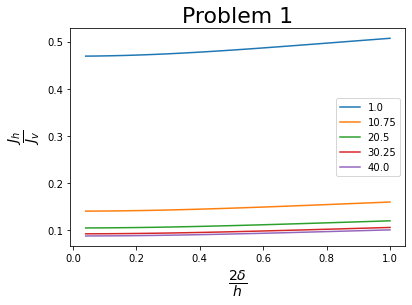

In [55]:
for i in range(0,length_height_ratio.size):
    plt.plot(2*delta/height_ft, ratio[:,i], label = length_height_ratio[i])
plt.xlabel(r"$\frac{2 \delta}{h}$", fontsize=20)
plt.ylabel(r"$\frac{J_h}{J_v}$", fontsize = 20)
plt.title("Problem 1", fontsize = 22)
plt.legend()